# 实战Kaggle比赛：预测房价

## Kaggle及数据集的介绍
### 什么是Kaggle？[Kaggle网站](https://www.kaggle.com/)
Kaggle是一个当今流行举办机器学习比赛的平台，每场比赛都以至少一个数据集为中心。从公司的角度来讲，可以提供一些数据，进而提出一个实际需要解决的问题；从参赛者的角度来讲，他们将组队参与项目，针对其中一个问题提出解决方案，最终由公司选出的最佳方案可以获得5K-10K美金的奖金。  
除此之外，Kaggle官方每年还会举办一次大规模的竞赛，奖金高达一百万美金，吸引了广大的数据科学爱好者参与其中。从某种角度来讲，大家可以把它理解为一个众包平台，类似国内的猪八戒。但是不同于传统的低层次劳动力需求，Kaggle一直致力于解决业界难题，因此也创造了一种全新的劳动力市场——不再以学历和工作经验作为唯一的人才评判标准，而是着眼于个人技能，为顶尖人才和公司之间搭建了一座桥梁。   
Kaggle首席科学家Jeremy Howard介绍了Kaggle的创建初衷及运营模式，即任用最聪明的人解决世界上最棘手的问题；同时，任何公司和组织都可以受益于机器学习的发展进步。   
### 房价预测比赛数据集 [房价预测比赛页面](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)    
此数据集由Bart de Cock于2011年收集，涵盖了2006-2010年期间亚利桑那州埃姆斯市的房价。
这个数据集是相当通用的，不会需要使用复杂模型架构。
它比哈里森和鲁宾菲尔德的[波士顿房价](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names)
数据集要大得多，也有更多的特征。

本节我们将详细介绍数据预处理、模型设计和超参数选择。
通过亲身实践，你将获得一手经验，这些经验将有益数据科学家的职业成长。
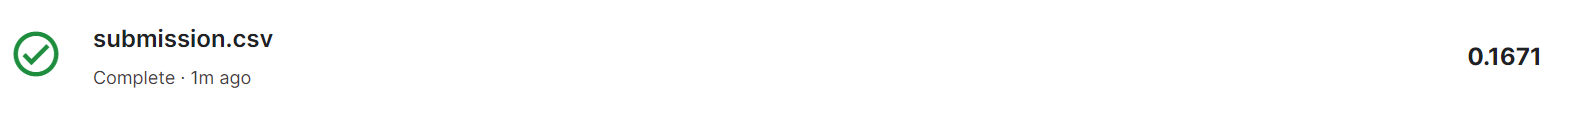

## 下载和缓存数据集

在整本书中，我们将下载不同的数据集，并训练和测试模型。
这里我们(**实现几个函数来方便下载数据**)。
首先，我们建立字典`DATA_HUB`，
它可以将数据集名称的字符串映射到数据集相关的二元组上，
这个二元组包含数据集的url和验证文件完整性的sha-1密钥。
所有类似的数据集都托管在地址为`DATA_URL`的站点上。    

In [1]:
import hashlib # Python 中的加密模块，其中拥有很多的加密算法，例如MD5 SHA1
import os  #os模块提供通用的、基本的操作系统交互功能。常用的有路径操作、进程管理、环境参数等
import tarfile  #用于解包和打包tar文件
import zipfile  #用来做zip格式编码压缩和解压缩的工具
import requests  #Requests是一常用的http请求库，它使用python语言编写，可以方便地发送http请求，以及方便地处理响应结果

#@save
DATA_HUB = dict() # 建立空字典，将数据集名称的字符串映射到数据集相关的二元组上，二元组包含数据集的url和验证文件完整性的sha-1密钥
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/' #所有类似的数据集都托管在地址为`DATA_URL`的站点上，有关本数的数据都可以在这个站点上并进行下载只需要将url=DATA_URL+‘文件名.csv’


[hashlib 模块](https://blog.csdn.net/weixin_42250835/article/details/123766881?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166764517416782417094721%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166764517416782417094721&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-1-123766881-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=hashlib%20&spm=1018.2226.3001.4187)                
[os模块](https://blog.csdn.net/jinsefm/article/details/80645423?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166765660416782414957297%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166765660416782414957297&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-2-80645423-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=os%E5%BA%93&spm=1018.2226.3001.4187)      
[压缩包模块tarfile和zipfile](https://blog.csdn.net/qq_42817803/article/details/125290621?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166765730516800180691438%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166765730516800180691438&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-4-125290621-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=tarfile%E5%BA%93&spm=1018.2226.3001.4187)     
[requests模块](https://blog.csdn.net/lihao21/article/details/51857385?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166765893416800182155878%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166765893416800182155878&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-26-51857385-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=requests%E5%BA%93&spm=1018.2226.3001.4187)    
**字典：**字典也是python内置的容器对象，其中包含若干元素，每个元素包含“键”，“值”两部分，两部分之间使用冒号分隔，表示一种对应关系。不同元素之间使用逗号分隔，所有元素放在一对大括号里面。“键”不允许重复,“值”可以重复。  
`
data1 = dict(name='张三',age='18',sex='M')
data2 = dict(zip('abcd',[1,2,3,4]))
print(data1)
print(data2)
输出：
{'name': '张三', 'age': '18', 'sex': 'M'}
{'a': 1, 'b': 2, 'c': 3, 'd': 4}
`   
**url：** 统一资源定位符，对可以从互联网上得到的资源的位置和访问方法的一种简洁的表示，是互联网上标准资源的地址，简单理解为网址。           
**sha-1：** 是一种数据加密算法，该算法的思想是接收一段明文，然后以一种不可逆的方式将它转换成一段（通常更小）密文，也可以简单的理解为取一串输入码（称为预映射或信息），并把它们转化为长度较短、位数固定的输出序列即散列值（也称为信息摘要或信息认证代码）的过程。 该算法输入报文的长度不限，产生的输出是一个160位的报文摘要。输入是按512 位的分组进行处理的。SHA-1是不可逆的、防冲突，并具有良好的雪崩效应。  类似于建模竞赛中提交的MD5码     
`certutil -hashfile kaggle_house_pred_train.csv SHA1`  
 `{'name': ('url','sha1-hash')}`    
**站点：** 一个站点（site）是一个存储区，它存储了一个网站包含的所有文件。通俗一点的说，一个站点就是一个网站所有内容所存放的文件夹。

下面的`download`函数用来下载数据集，
将数据集缓存在本地目录（默认情况下为`../data`）中，
并返回下载文件的名称。
如果缓存目录中已经存在此数据集文件，并且其sha-1与存储在`DATA_HUB`中的相匹配，
我们将使用缓存的文件，以避免重复的下载。


In [2]:
def download(name, cache_dir=os.path.join('\\', 'data')):  #@save
    """下载一个DATA_HUB中的文件，返回本地文件名"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}"
    #如果name在DATA_HUB里，程序正常往下运行，
    #如果不在，则抛出AssertionError错误，报错内容为“name不存在于 DATA_HUB”
    url, sha1_hash = DATA_HUB[name]  #{'name': ('url','sha1-hash')}#前一个是网址，后面一个是sha1密钥，这里的DATA_HUB[NAAME]是一个元组包含两个元素
    os.makedirs(cache_dir, exist_ok=True) 
    #用来创建多层目录，目录名为'cache_dir',目标目录存在已经存在时不报错
    fname = os.path.join(cache_dir, url.split('/')[-1])  
    #以/为分割符保留url的最后一段（文件名），cache_dir与url.split('/')[-1]连接起来
    ## 示例：..\\data\\kaggle-house-price-%E6%B1%87%E6%8A%A5%E7%89%88%E6%9C%AC.ipynb
    if os.path.exists(fname):  #判断'fname'是否存在,存在则返回True
        #加密模块在工作中被广泛应用。比如数据的传入 不希望被捕获，通过把数据加密。这样即使被捕获也无法获取到数据的真实信息.
        sha1 = hashlib.sha1()  #创建sha1对象，使用sha1加密算法进行加密
        #如果fname文件已经存在那么就直接打开文件
        with open(fname, 'rb') as f: #以二进制格式打开fname文件用于只读
            while True:  #循环语句
                data = f.read(1048576) #每次读取1048576字节，也就是1MB
                if not data: # 判断文件是否读取完毕，如果读完了，就会返回为空的字符串，if not data它只是检查收到的 data 是否为空，如果是那么是True
                    break  #while True 语句中一定要有结束该循环的break语句，否则会一直循环下去的
                sha1.update(data) #对sha1进行更新  每个数据都有sha1密钥
        if sha1.hexdigest() == sha1_hash: ##以16进制的格式输出密文
        #判断缓存目录中已经存在的此数据集文件的sha-1与存储在DATA_HUB中的是否相匹配
            return fname  #返回本地文件名
    print(f'正在从{url}下载{fname}...')
    r = requests.get(url, stream=True, verify=True)  ##以字节流的形式从url上下载数据集
    #下载完数据之后打开文件
    with open(fname, 'wb') as f: #以二进制格式打开fname文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。
        f.write(r.content)  # r.content返回的是bytes型也就是二进制的数据
    return fname  #返回本地文件名

[Request库的get()方法](https://blog.csdn.net/k_koris/article/details/82950654?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166792191816800180685774%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166792191816800180685774&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-82950654-null-null.142^v63^control,201^v3^control_2,213^v2^t3_control1&utm_term=requests.get&spm=1018.2226.3001.4187)   
request.get（url）构造一个向服务器请求资源的url对象     
返回的是一个Response对象，包含从服务器返回的所有的相关资源。    
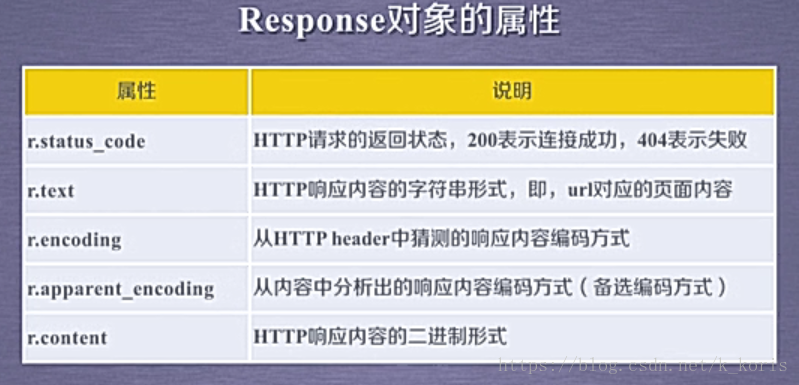
`requests.get(url, stream=True, verify=True)`  
**url:** 基准的url地址，不包含查询参数     
**stream:**   
stream=False(默认)，它会立即开始下载文件并一次性加载到内存中，如果文件过大，有可能导致内存不足。   
stream=True，以字节流的方式进行读取文件并加载到内存中，适合于大文件下载。   
**verify（SSL证书认证参数）:**   
verify=True(默认): 检查证书认证。如果SSL证书验证不通过，或者不信任服务器的安全证书，则会报出SSLError。   
verify=False（常用）: 忽略证书认证  

SSL即 Secure Sockets Layer，为网络通信提供安全及数据完整性的一种安全协议。SSL 在传输层与应用层之间对网络连接进行加密。SSL证书是一种数字证书。也经常被通俗地称为“https证书”、“CA证书”、“安全证书”、“服务器证书”以及“ssl”。

我们还需实现两个实用函数：
一个将下载并解压缩一个zip或tar文件，
另一个是将本书中使用的所有数据集从`DATA_HUB`下载到缓存目录中。


In [3]:
#
def download_extract(name, folder=None):  #@save
    """下载并解压zip/tar文件"""
    fname = download(name)  #将download函数返回的本地文件名以及路径赋给fname
    base_dir = os.path.dirname(fname)  #去掉文件名，返回目录
        #示例：os.path.dirname('..\\data\\house.zip')
        #结果：'..\\data'
    data_dir, ext = os.path.splitext(fname) #将文件名和扩展名分开
        #示例：os.path.splitext('..\\data\\house.zip')
        #结果：'..\\data\\house', '.zip'
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r') #创建一个ZipFile对象，以只读的方法打开zip文件
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r') #以只读的方法打开tar文件或者gz文件
    else:
        assert False, '只有zip/tar文件可以被解压缩' 
    fp.extractall(base_dir)  #将fp所有文件解压缩至base_dir目录下
    return os.path.join(base_dir, folder) if folder else data_dir
    # 如果folder不为None，则输出os.path.join(base_dir, folder)  '..\\data\\folder'
    #如果folder为None，则输出data_dir  '..\\data\\house'
    #个人看法：
    #folder为None时，若压缩包里的一级目录名称与压缩包名称不相符，则无法准确返回数据集所在的路径
    #此时，需要指定folder以返回数据集所在的最底层路径

def download_all():  #@save
    """下载DATA_HUB中的所有文件"""
    for name in DATA_HUB:
        download(name)

## 访问和读取数据集

注意，竞赛数据分为训练集和测试集。
每条记录都包括房屋的属性值和属性，如街道类型、施工年份、屋顶类型、地下室状况等。
这些特征由各种数据类型组成。
例如，建筑年份由整数表示，屋顶类型由离散类别表示，其他特征由浮点数表示。
这就是现实让事情变得复杂的地方：例如，一些数据完全丢失了，缺失值被简单地标记为“NA”。
每套房子的价格只出现在训练集中（毕竟这是一场比赛）。
我们将希望划分训练集以创建验证集，但是在将预测结果上传到Kaggle之后，
我们只能在官方测试集中评估我们的模型。

**当我们只有验证集没有训练集的时候可以用K折交叉验证**

In [4]:
# 如果你没有安装pandas，请取消下一行的注释
# !pip install pandas

%matplotlib inline
import numpy as np  #是数值计算的扩展包，它能高效处理N维数组,复杂函数,线性代数
import pandas as pd  #做数据处理,是python的一个数据分析包
import torch
from torch import nn  #torch.nn是一个神经网络库，包含了许多模型、以及损失函数、激活函数
from d2l import torch as d2l 

为方便起见，我们可以使用上面定义的脚本下载并缓存Kaggle房屋数据集。


In [5]:
#字典
#!/usr/bin/python
# -*- coding: UTF-8 -*-
 
tinydict = {'Name': 'Zara', 'Age': 7, 'Class': 'First'}
 
tinydict['Age'] = 8 # 更新
tinydict['School'] = "RUNOOB" # 添加新元素
tinydict['me']=(1,2)
 
print(tinydict['Age'])#, tinydict['Age']
print(tinydict['School'])# ", tinydict['School']
print(tinydict['me'])
print(type(tinydict['me']))#返回的是元组

8
RUNOOB
(1, 2)
<class 'tuple'>


元组：https://www.runoob.com/python/att-tuple-tuple.html

In [6]:
DATA_HUB['kaggle_house_train'] = (  #@save  
    DATA_URL + 'kaggle_house_pred_train.csv',
    '585e9cc93e70b39160e7921475f9bcd7d31219ce')  
     #增加新元素，键为'kaggle_house_train'，
     #值为二元组( DATA_URL + 'kaggle_house_pred_train.csv', '585e9cc93e70b39160e7921475f9bcd7d31219ce')  
     #把这组键值对写入DATA_HUB并导入到d2l包
DATA_HUB['kaggle_house_test'] = (  #@save
    DATA_URL + 'kaggle_house_pred_test.csv',
    'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')


In [7]:
DATA_HUB
#'http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv该网址进入就是一个文件直接就下载kaggle_house_pred_train为excel文件

#fa19780a7b011d9b009e8bff8e99922a8ee2eb90是我们定义的sha1密钥一般维40位的字节，当我们可以更改sha1密钥的时候因为这时候的密钥根据download函数的定义会判断已经储存的文件与新的文件的密钥是否相等改变将重新下在文件，如果不相等那么会重新下载

{'kaggle_house_train': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv',
  '585e9cc93e70b39160e7921475f9bcd7d31219ce'),
 'kaggle_house_test': ('http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_test.csv',
  'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')}

我们使用`pandas`分别加载包含训练数据和测试数据的两个CSV文件。


In [8]:
train_data = pd.read_csv(download('kaggle_house_train')) #读取下载好的训练集csv文件
test_data = pd.read_csv(download('kaggle_house_test'))
#文件下载位置C:\data

正在从http://d2l-data.s3-accelerate.amazonaws.com/kaggle_house_pred_train.csv下载\data\kaggle_house_pred_train.csv...


EmptyDataError: No columns to parse from file

训练数据集包括1460个样本，每个样本80个特征和1个标签，
而测试数据集包含1459个样本，每个样本80个特征。


In [18]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


让我们看看[**前四个和最后两个特征，以及相应标签**]（房价）。


In [19]:
print(train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]) #对数据进行位置索引

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [20]:
print(type(train_data))
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


#### pandas的DAataFrame简单介绍
https://www.runoob.com/pandas/pandas-dataframe.html

DataFrame 是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔型值）。DataFrame 既有行索引也有列索引，它可以被看做由 Series 组成的字典（共同用一个索引）。

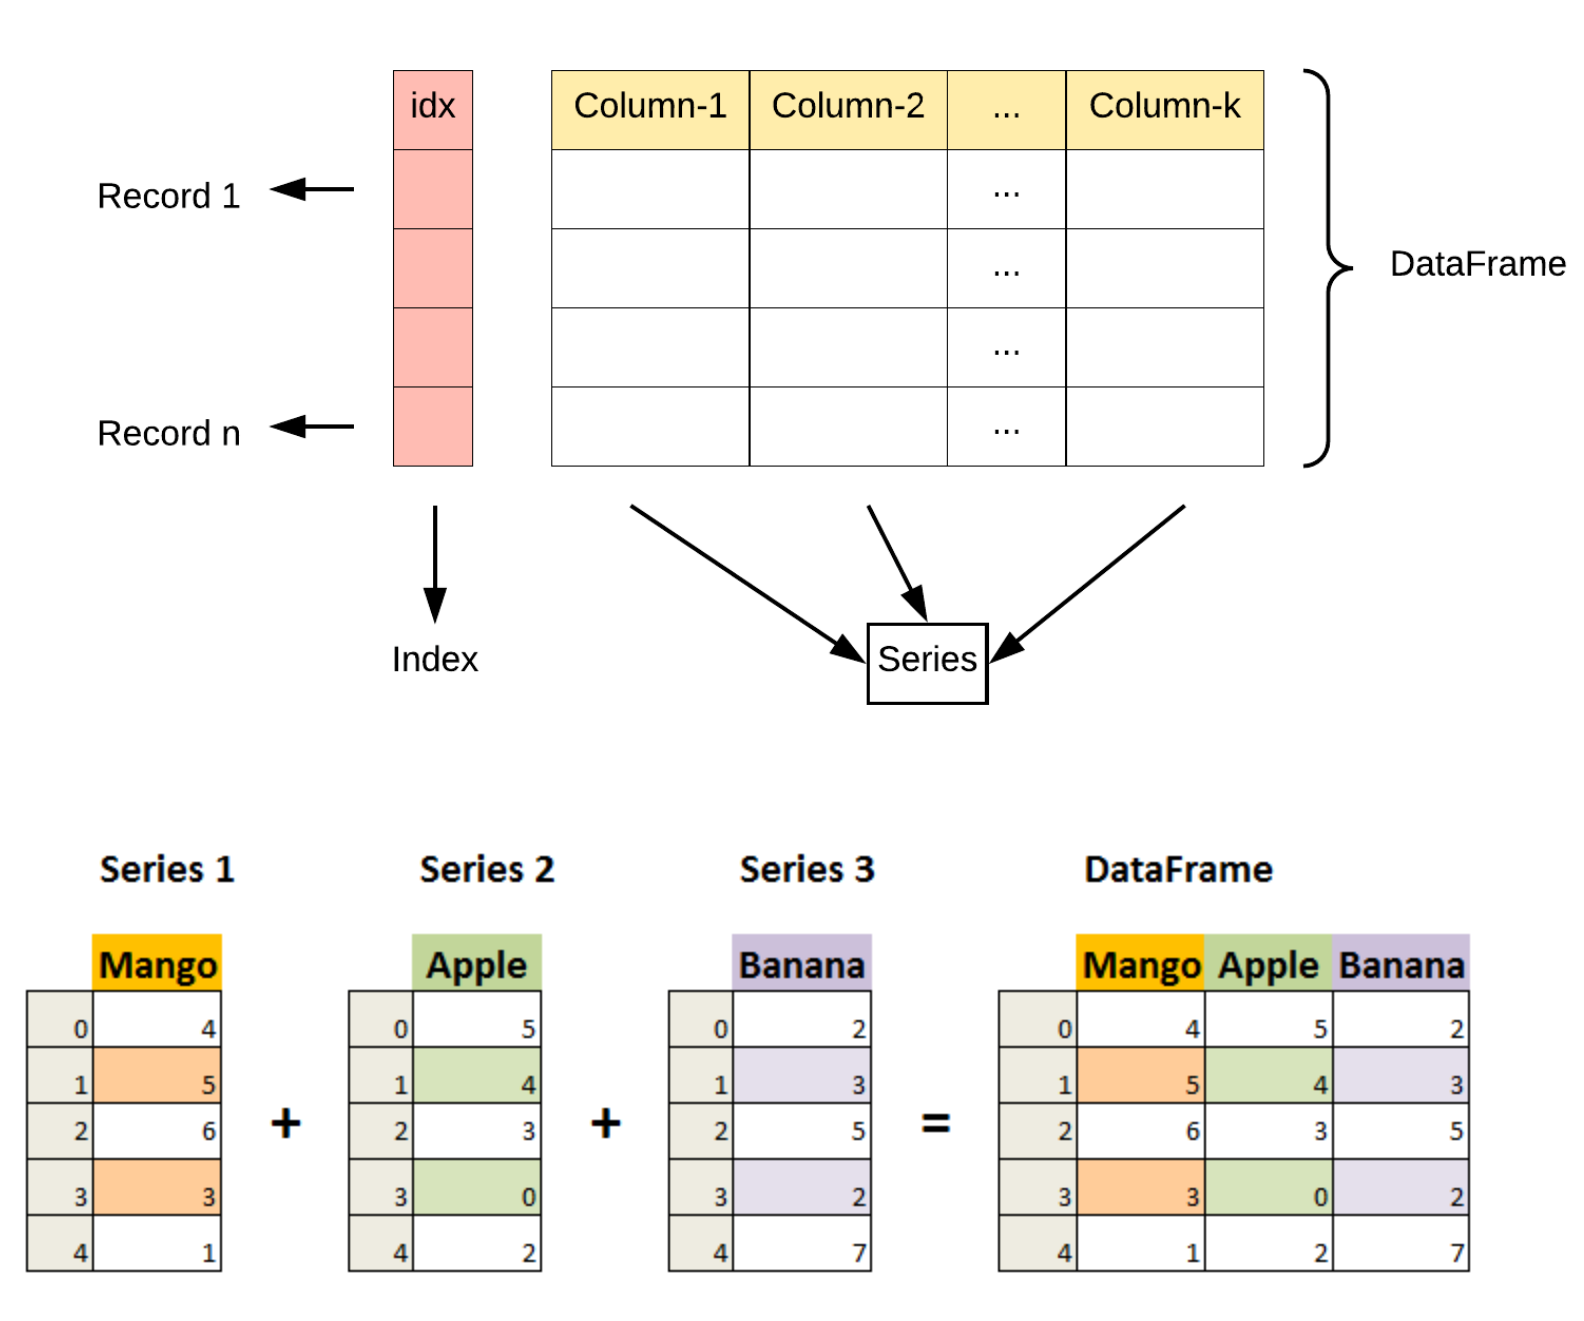

pandas.DataFrame( data, index, columns, dtype, copy)
参数说明：

data：一组数据(ndarray、series, map, lists, dict 等类型)。

index：索引值，或者可以称为行标签。

columns：列标签，默认为 RangeIndex (0, 1, 2, …, n) 。

dtype：数据类型。

copy：拷贝数据，默认为 False。

Pandas DataFrame 是一个二维的数组结构，类似二维数组



我们可以看到，(**在每个样本中，第一个特征是ID，**)
这有助于模型识别每个训练样本。
虽然这很方便，但它不携带任何用于预测的信息。
因此，在将数据提供给模型之前，(**我们将其从数据集中删除**)。


In [23]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
print(train_data.iloc[:3,:])#.iloc的作用是为了能够对pandas中的DAtaFrame数据进行提取数据
#print(train_data[:3,:])#报错

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]


[pd.concat()](https://blog.csdn.net/Mr_HHH/article/details/79488445?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166773686416782417036236%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166773686416782417036236&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-79488445-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=pd.concat&spm=1018.2226.3001.4187)  
将数据合并,即将训练集的特征和测试集的特征合并。   
[iloc[]](https://blog.csdn.net/Fwuyi/article/details/123127754?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166773698916782390558694%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166773698916782390558694&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_click~default-2-123127754-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=iloc%E5%87%BD%E6%95%B0&spm=1018.2226.3001.4187)  
对数据进行位置索引，从而在数据表中提取出相应的数据。

In [40]:

print(all_features.shape)#去掉了测试集中的标签，只保留了特征，将测试机和训练集共有的特征保留下来，将两者数据加起来
print(train_data.shape)
print(test_data.shape)
print(type(all_features))#仍然是pandans中的数据类型
all_features.index,type(all_features.index),type(all_features.dtypes),all_features.dtypes
#all_features.dtypes,series数据类型，第一列是index,第二列是vales


(2919, 79)
(1460, 81)
(1459, 80)
<class 'pandas.core.frame.DataFrame'>


(Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458],
            dtype='int64', length=2919),
 pandas.core.indexes.numeric.Int64Index,
 pandas.core.series.Series,
 MSSubClass       float64
 MSZoning          object
 LotFrontage      float64
 LotArea          float64
 Street            object
                   ...   
 MiscVal          float64
 MoSold           float64
 YrSold           float64
 SaleType          object
 SaleCondition     object
 Length: 79, dtype: object)

In [41]:
all_features.info()  # 查看特征的基本信息

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   float64
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   float64
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   float64
 17  OverallCond    2919 non-null   float64
 18  YearBuil

![object](https://img-blog.csdnimg.cn/img_convert/468e4350b73ac0616c0c18adf0b287d9.png)

## 数据预处理

如上所述，我们有各种各样的数据类型。
在开始建模之前，我们需要对数据进行预处理。
首先，我们[**将所有缺失的值替换为相应特征的平均值。**]然后，为了将所有特征放在一个共同的尺度上，
我们(**通过将特征重新缩放到零均值和单位方差来标准化数据**)：

$$x \leftarrow \frac{x - \mu}{\sigma},$$

其中$\mu$和$\sigma$分别表示均值和标准差。现在，这些特征具有零均值和单位方差。

In [42]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
#下面是获取数值型的列
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index #all_features.dtypes收series数据类型，第一列是index,第二列是vales取出数值型类型
#all_features[numeric_features]保留all_features所有的数值列
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std())) #对数值型特征进行标准化处理，也就是我们保留的所有的数值列应用(x - x.mean()) / (x.std())函数因为默认的是制定axis=0，也就是按照列进行运损，相当于将每一列看成一个向量
# 在标准化数据之后，其均值变为0，我们将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

[pandas 数据结构介绍](https://blog.csdn.net/weixin_38477351/article/details/107028044?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166774556016782427484385%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166774556016782427484385&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-4-107028044-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=pandas%E6%95%B0%E6%8D%AE%E7%BB%93%E6%9E%84&spm=1018.2226.3001.4187)

series介绍：
https://zhuanlan.zhihu.com/p/51113102#:~:text=Pandas%E7%9A%84

DataFrame结构支持对行和列进行切片，也支持访问特定行和列对应的数据，或者访问符合特定条件的数据    
`all_features[numeric_features]`    
取出所有样本数值型特征的数据，shape为（2919,36）    
`apply(lambda x: (x - x.mean()) / (x.std()),[axis=0])`       
pandas的apply()函数可以作用于Series或者整个DataFrame，功能也是自动遍历整个Series或者 DataFrame,对每一个元素运行指定的函数，默认情况下 axis= 0，按列进行计算。     
[apply() 函数用法](https://blog.csdn.net/stone0823/article/details/100008619?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166774656916782429776730%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166774656916782429776730&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-6-100008619-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=.apply%28%20%20%20%20%20lambda%20x%3A%20&spm=1018.2226.3001.4187)

In [43]:
all_features.dtypes  

MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
                  ...   
MiscVal          float64
MoSold           float64
YrSold           float64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [44]:
type(all_features.dtypes) 

pandas.core.series.Series

In [45]:
all_features.dtypes[all_features.dtypes != 'object']  #36个数值型特征

MSSubClass       float64
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
TotRmsAbvGrd     float64
Fireplaces       float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
PoolArea         float64
MiscVal          float64
MoSold           float64
YrSold           float64
dtype: object

In [46]:
all_features.dtypes[all_features.dtypes != 'object'].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [47]:
all_features[numeric_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.067320,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,...,0.348840,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619
1,-0.873466,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,...,-0.059782,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858
2,0.067320,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,...,0.627446,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619
3,0.302516,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,...,0.785323,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335
4,0.067320,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,...,1.686149,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619


In [54]:
type(all_features),all_features.values,type(all_features.values)#数组

(pandas.core.frame.DataFrame,
 array([[ 0.06731988, -0.20203292, -0.21784137, ...,  1.        ,
          0.        ,  0.        ],
        [-0.87346638,  0.5017845 , -0.07203174, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.06731988, -0.06126943,  0.13717338, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [-0.87346638,  4.25547741,  1.24659445, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.65531129, -0.3427964 ,  0.03459947, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.06731988,  0.22025754, -0.06860838, ...,  1.        ,
          0.        ,  0.        ]]),
 numpy.ndarray)

接下来，我们[**处理离散值。**]
这包括诸如“MSZoning”之类的特征。
(**我们用独热编码替换它们**)，
方法与前面将多类别标签转换为向量的方式相同。
例如，“MSZoning”包含值“RL”和“Rm”。
我们将创建两个新的指示器特征“MSZoning_RL”和“MSZoning_RM”，其值为0或1。
根据独热编码，如果“MSZoning”的原始值为“RL”，
则：“MSZoning_RL”为1，“MSZoning_RM”为0。
`pandas`软件包会自动为我们实现这一点。


In [49]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 331)

[pd.get_dummies( )](https://blog.csdn.net/maymay_/article/details/80198468?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166782875716782428675672%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166782875716782428675672&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-1-80198468-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=pd.get_dummies%28%20%29&spm=1018.2226.3001.4187)    
将离散型特征的每一种取值都看成一种状态，若你的这一特征中有N个不相同的取值，那么我们就可以将该特征抽象成N种不同的状态，one-hot编码保证了每一个取值只会使得一种状态处于“激活态”，也就是说这N种状态中只有一个状态位值为1，其他状态位都是0。  
`pd.get_dummies( data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, drop_first=False,)`  
data : 输入的数据  array-like, Series, or DataFrame     
**dummy_na** : dummy_na=True时，增加一列表示空缺值，如果是False就忽略空缺值     

**使用Pandas对数据进行处理，使用Pytorch对模型进行训练**   
Pandas中的数据结构为Series和DataFrame   
Pytorch中的数据结构为Tensor   
数据转换需要借助NumPy，因为无论使用哪个深度学习框架，它的张量类都与Numpy的ndarray类似

通过`values`属性，我们可以
[**从`pandas`格式中提取NumPy格式，并将其转换为张量表示**]用于训练。

In [50]:
n_train = train_data.shape[0]   #获取训练集的样本数量  train_data.shape为(1460, 81)   
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)#all_features[:n_train].values表示提取前训练集，并且去掉index,只保留values，是一个数组，torch.tensor([1,2])中的[1,2]就是数组
#all_features[:n_train].values 取出第0到第1459行（即训练集）的特征值
#dtype=torch.float32   将数据类型更改为float32，因为tensor默认的数据类型为torch.float32
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
#all_features[n_train:].values 取出第1460到第2918行（即测试集）的特征值
train_labels = torch.tensor(
    train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)
#取训练集的SalePrice列数据，将其形状更改为(1460,1)
#train_data.SalePrice.values的shape为(1460,)

In [60]:
train_data.SalePrice#仍然是一个DataFrame,那么.values就变成了数组

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [28]:
type(all_features[:n_train].values)  #返回数据结构 

numpy.ndarray

In [29]:
all_features[:n_train].values.dtype   #返回数据类型

dtype('float64')

In [30]:
train_features.shape, test_features.shape, train_labels.shape#是一个一味的张量

(torch.Size([1460, 331]), torch.Size([1459, 331]), torch.Size([1460, 1]))

## [**训练**]

首先，我们训练一个带有损失平方的线性模型，将其作为*基线*（baseline）模型，
让我们直观地知道最好的模型有超出简单的模型多少。


In [61]:
loss = nn.MSELoss()  #均方损失函数
in_features = train_features.shape[1]  #返回特征数量，即331

def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))  #单层的线性神经网络
    #输入神经元的个数是in_features（331），输出神经元的个数为1
    return net

**nn.Sequential() 将多层串联在一起**  
模型接收的输入首先被传入nn.Sequential()包含的第一个网络模块中。然后，第一个网络模块的输出传入第二个网络模块作为输入，按照顺序依次计算并传播，直到nn.Sequential()里的最后一个模块输出结果。  
**nn.Linear定义一个神经网络的线性层**   
`torch.nn.Linear(in_features,out_features,bias=True )`     
 in_features：输入的神经元个数  
 out_features：输出的神经元个数    
 bias=True：包含偏置   
 [nn.Linear的基本用法](https://blog.csdn.net/zhaohongfei_358/article/details/122797190?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166783214116782425192605%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=166783214116782425192605&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~hot_rank-5-122797190-null-null.142^v63^control,201^v3^control_2,213^v1^t3_control2&utm_term=nn.Linear&spm=1018.2226.3001.4187)  

房价就像股票价格一样，我们关心的是相对数量，而不是绝对数量。
因此，[**我们更关心相对误差$\frac{y - \hat{y}}{y}$，**]
而不是绝对误差$y - \hat{y}$。
例如，如果我们在俄亥俄州农村地区估计一栋房子的价格时，
假设我们的预测偏差了10万美元，
然而那里一栋典型的房子的价值是12.5万美元，
那么模型可能做得很糟糕。
另一方面，如果我们在加州豪宅区的预测出现同样的10万美元的偏差，
（在那里，房价中位数超过400万美元）
这可能是一个不错的预测。

(**解决这个问题的一种方法是用价格预测的对数来衡量差异**)。
事实上，这也是比赛中官方用来评价提交质量的误差指标。预测价格的对数与真实标签价格的对数之间出现以下均方根误差：

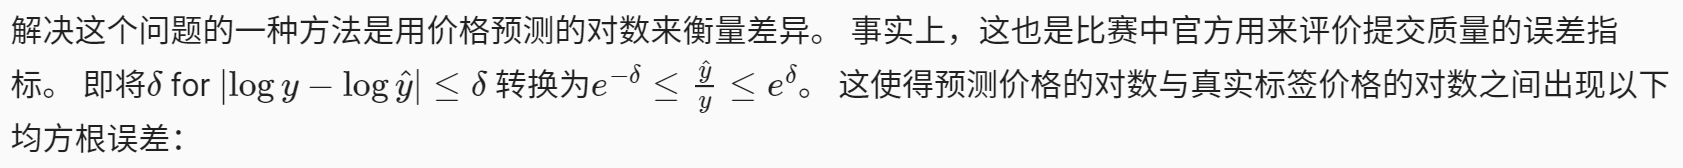

$$\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}.$$


In [62]:
def log_rmse(net, features, labels):  #定义对数-均方根误差函数 
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    #将预测数据限制在1到正无穷之间
    #float('inf')表示为正无穷，float('-inf')表示为负无穷
    #计算对数-均方根误差
    rmse = torch.sqrt(loss(torch.log(clipped_preds), 
                           torch.log(labels))) #括号里面的是MSE误差
    return rmse.item()  
    #将tensor格式转化为python的数据类型格式，可理解为得到一个数值（标量）
    #x = torch.tensor([2.0]) 
    #x, x.item() 
    #(tensor([2.]), 2.0)

与前面的部分不同，[**我们的训练函数将借助Adam优化器**]
（我们将在后面章节更详细地描述它）。
Adam优化器的主要吸引力在于它对初始学习率不那么敏感。


In [63]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], [] #创建存放训练误差和测试误差的列表
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    #训练集迭代器（根据batch_size，每次取出一个batch的数据）
    # 构造一个优化器对象optimizer，这里使用的是Adam优化算法与SGD方法不同哦
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs): #遍历每一个迭代周期
        for X, y in train_iter:    #每次取一个batch的特征及标签
            optimizer.zero_grad()  #梯度清零
            l = loss(net(X), y)    #计算误差
            l.backward()    #反向传播计算得到每个参数的梯度值
            optimizer.step()  #通过梯度下降对参数进行一次更新
        train_ls.append(log_rmse(net, train_features, train_labels))
        #append() 函数可以向列表末尾添加元素，即向train_ls中添加对数-均方根误差
        #每经历一次迭代，就向train_ls中添加一个误差（最终总共有num_epochs个误差）
        if test_labels is not None:  
            #如果test_labels不是None，则计算测试集的对数-均方根误差，并将其添加到test_ls，测试集怎么是空呢
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

[torch.optim优化算法理解之optim.Adam()](https://blog.csdn.net/lj2048/article/details/114889359?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166800442616782388067222%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166800442616782388067222&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-114889359-null-null.142^v63^control,201^v3^control_2,213^v2^t3_control1&utm_term=torch.optim.Adam&spm=1018.2226.3001.4187)  
[理解optimizer.zero_grad(), loss.backward(), optimizer.step()的作用及原理](https://blog.csdn.net/PanYHHH/article/details/107361827?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166834860416782428649499%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166834860416782428649499&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-107361827-null-null.142^v63^control,201^v3^control_2,213^v2^t3_control1&utm_term=optimizer.step%28%29&spm=1018.2226.3001.4187)   

## $K$折交叉验证

你可能还记得，我们在讨论模型选择的部分中介绍了[**K折交叉验证**]，它有助于模型选择和超参数调整。我们首先需要定义一个函数，在$K$折交叉验证过程中它选择第$i$个切片作为验证数据，其余部分作为训练数据。

In [69]:
#呵呵呵真牛
#第i折为验证集
def get_k_fold_data(k, i, X, y): 
    assert k > 1
    fold_size = X.shape[0] // k  #//是取整的意思，得到每一折的样本数量（容量），比如有25组数据5折交叉验证，那么每一折的样本数量就是5
    X_train, y_train = None, None
    #获取每一折的数据，并对其按照验证集和训练集进行划分 
    for j in range(k):  #0，1，2，3，...，k-1
        idx = slice(j * fold_size, (j + 1) * fold_size)  #得到第j折的索引
        #这里的idx类似于(j * fold_size : (j + 1) * fold_size)，每一折容量为fold_size
        #假设总共有21组数据，k=4，则fold_size=21// 4=5 ，你们最后一组数据就被抛弃了
        X_part, y_part = X[idx, :], y[idx]  #得到第j折的数据
        if j == i:  #如果i=j，则第j折数据为验证集
            X_valid, y_valid = X_part, y_part
        elif X_train is None:  #如果X_train为空（第一次看到X_train），第j折数据为训练集,当 j=0的时候X_train就额是None,之后当j=1的时候X_train就不为空了
            X_train, y_train = X_part, y_part
        else:  #如果X_train不为空，将X_train数据与第j折数据拼接为训练集
            X_train = torch.cat([X_train, X_part], 0)  #沿轴0方向进行拼接
            y_train = torch.cat([y_train, y_part], 0) 
    return X_train, y_train, X_valid, y_valid    #第i折为验证集，其余k-1折为训练集

`slice(start,end)`   
slice() 函数实现切片功能，可以用在任何可以被切片的地方。   
返回一个切片对象，表示由 range(start, stop, step) 指定的索引集。 start 和 step 参数默认为None。  
[python内置函数slice()](https://blog.csdn.net/qq_44940689/article/details/122563934?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166835095416782429791146%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166835095416782429791146&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-2-122563934-null-null.142^v63^control,201^v3^control_2,213^v2^t3_control1&utm_term=slice%EF%BC%88%EF%BC%89&spm=1018.2226.3001.4187)

In [65]:
a=torch.arange(10)
b=slice(1,5)
a[b],a

(tensor([1, 2, 3, 4]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

当我们在$K$折交叉验证中训练$K$次后，[**返回训练和验证误差的平均值**]。


In [74]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0#训练集损失总和，测试集损失总和
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train) 
        #取出第i折为验证集时对应的训练集和验证集
        #data = (X_train, y_train, X_valid, y_valid)
        net = get_net()  #net = nn.Sequential(nn.Linear(in_features,1))  
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        #上面一步就是当i个是训练集的时候，训练模型得到训练集和测试集的均方根误差，因为是周期的，根据函数的定义可知，返回的是一个向量，地i个元素的地i个迭代周期的均方根误差，我们这里取最后一个元素作为最后的误差
        #*是解包，变成前面返回的四个数据,当有多个数据的时候传入参数需要用*
        #对训练误差和验证误差分别进行累加，得到k次实验的总误差
        train_l_sum += train_ls[-1] # train_l_sum = train_l_sum + train_ls[-1]
        valid_l_sum += valid_ls[-1]
        #train_ls[-1] 最后一次迭代的训练误差
        if i == 0:   # 举例：画出i=0时（即第一折为验证集）的训练误差及验证误差的图像
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log') 
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
        #
        #train_ls，valid_ls当i个是训练集的时候，训练模型得到训练集和测试集的均方根误差，因为是周期的，根据函数的定义可知，返回的是一个向量，地i个元素的地i个迭代周期的均方根误差，我们这里取最后一个元素作为最后的误差
        #打印出每一次实验（共k次）的训练误差和验证误差（log_rmse）
    return train_l_sum / k, valid_l_sum / k #返回训练和验证误差的平均值，i=0,1,2,...,k-1的时候所对应的训练集的误差，取平均，测试集同理

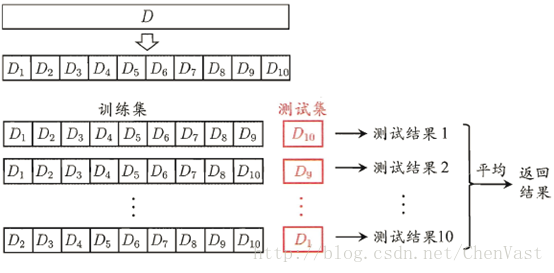

[设置坐标轴缩放类型（xscale、yscale）](https://blog.csdn.net/mighty13/article/details/115556807) 

## [**模型选择**]

在本例中，我们选择了一组未调优的超参数，并将其留给读者来改进模型。
找到一组调优的超参数可能需要时间，有了足够大的数据集和合理设置的超参数，$K$折交叉验证往往对多次测试具有相当的稳定性。然而，如果我们尝试了不合理的超参数，我们可能会发现验证效果不再代表真正的误差。

折1，训练log rmse0.170722, 验证log rmse0.156543
折2，训练log rmse0.162600, 验证log rmse0.190642
折3，训练log rmse0.164165, 验证log rmse0.168582
折4，训练log rmse0.168180, 验证log rmse0.154847
折5，训练log rmse0.163417, 验证log rmse0.183206
5-折验证: 平均训练log rmse: 0.165817, 平均验证log rmse: 0.170764


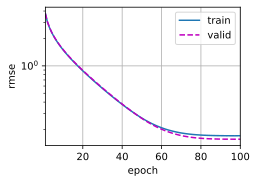

In [71]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

**k:** 训练集划分的折数，与数据集大小相关。如果训练数据集相对较小，则增大k值。增大k值，在每次迭代过程中将会有更多的数据用于模型训练，能够得到最小偏差，同时算法时间延长。如果训练集相对较大，则减小k值。减小k值，降低模型在不同的数据块上进行重复拟合的性能评估的计算成本，在平均性能的基础上获得模型的准确评估。k一般取5或10。   
**num_epochs:** 迭代次数是指训练集输入到神经网络进行训练的次数，当测试误差和训练误差相差较小时，可认为当前的迭代次数是合适的，否则需继续增大迭代次数。   
**lr:** 学习率是指在优化算法中更新网络权重的幅度大小。学习率设置比较大的话参数每次调整幅度就大，设置小的话，那么参数调整幅度小，就需要更多的迭代次数。刚开始训练的时候，学习率设置大一点，以加快学习速度；之后逐渐减小学习率，来寻找最优解。    
**weight_decay：** 权重衰减可以避免模型过拟合问题，一般从0开始往大调。   
**batch_size:** 批量大小，即每次训练在训练集中取batch_size个样本进行训练，选取范围一般位于区间[16,128]内。GPU对2的幂次的batch可以发挥更佳的性能，因此设置成16、32、64、128…时往往要比设置为整10、整100的倍数时表现更优。在调整时要在合理的范围内逐渐增大batch_size。
[batch size设置技巧 谈谈batchsize参数](https://blog.csdn.net/zqx951102/article/details/88918948)    
[神经网络的参数优化方法](https://blog.csdn.net/cuicheng01/article/details/83305854?ops_request_misc=&request_id=&biz_id=102&utm_term=%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E8%BF%AD%E4%BB%A3%E6%AC%A1%E6%95%B0%E8%AE%BE%E7%BD%AE&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-3-83305854.142^v63^control,201^v3^control_2,213^v2^t3_control1&spm=1018.2226.3001.4187)

##  [**提交你的Kaggle预测**]
一般情况将K折交叉验证用于模型调优，找到使得模型泛化性能最优的超参值。找到后，在全部训练集上（而不是仅使用交叉验证中使用的$1-1/K$的数据）重新训练模型，并将得到的模型用于测试集，将预测保存在CSV文件中可以简化将结果上传到Kaggle的过程。

In [82]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    #训练集的均方根误差，是个向量，每个迭代周期的对数均方根误差
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    #第二个变量（测试误差）得到的是一个空列表，用_代替（y因为我们的而训练集中没有标签）
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')  #打印出最后一次迭代的训练误差
    # 将网络应用于测试集
    preds = net(test_features).detach().numpy() # net(test_features)是一个二维的张量，也就是去掉梯度保留数值并转换成numppy的形式，仍然是二维的
    # 将预测值从当前计算图中分离下来并转化为ndarray变量
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0]) #因为preds.reshape（-1，1）之后仍然是个俄日的，那么将其preds.reshape(1, -1)[0]就变成一维的了,没有就会报错
    #test_data为pandas中的DataFrame数据结构，shape为(1459, 80)，不包含'SalePrice'列
    #将预测值加入到test_data数据集中，列索引为'SalePrice'
    #将预测值从ndarray数据结构转换为Series数据结构（从而得到‘列向量’）
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    #将test_data的'Id'列与'SalePrice'按照列1进行拼接
    submission.to_csv('submission.csv', index=False)
    #将submission存储为csv文件,保存在当前工作路径下，bu

`tensor.detach()`  
返回一个新的tensor，从当前计算图中分离下来的，但是仍指向原变量的存放位置,不同之处只是requires_grad为false，得到的这个tensor永远不需要计算其梯度，不具有grad。即使之后重新将它的requires_grad置为true,它也不会具有梯度grad  
[.detach() .detach_() 的作用和区别](https://blog.csdn.net/qq_27825451/article/details/95498211)

`to_csv`  
to_csv('Result.csv') 相对位置，保存在getwcd()获得的路径下
to_csv('C:/Users/think/Desktop/Result.csv')  绝对位置   
[pandas的to_csv()使用方法](https://blog.csdn.net/toshibahuai/article/details/79034829?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522166826665916782391823262%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=166826665916782391823262&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-79034829-null-null.142^v63^control,201^v3^control_2,213^v2^t3_control1&utm_term=to_csv&spm=1018.2226.3001.4187)

如果测试集上的预测与$K$倍交叉验证过程中的预测相似，
那就是时候把它们上传到Kaggle了。
下面的代码将生成一个名为`submission.csv`的文件。


训练log rmse：0.162659


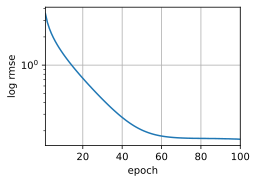

In [83]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)

接下来，我们可以提交预测到Kaggle上，并查看在测试集上的预测与实际房价（标签）的比较情况。
步骤非常简单：
* 登录Kaggle网站，访问房价预测竞赛页面。
* 点击“Submit Predictions”或“Late Submission”按钮（在撰写本文时，该按钮位于右侧）。
* 点击页面底部虚线框中的“Upload Submission File”按钮，选择你要上传的预测文件。
* 点击页面底部的“Make Submission”按钮，即可查看你的结果。
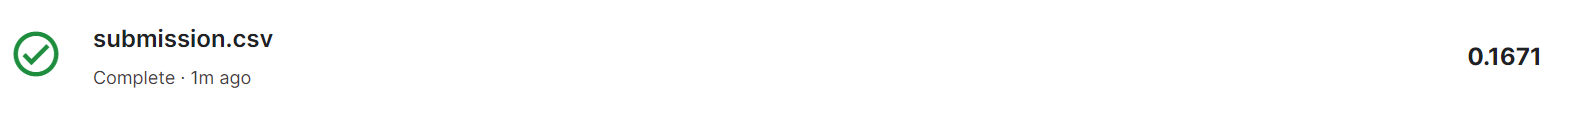
## 小结

* 真实数据通常混合了不同的数据类型，需要进行预处理（使用Pandas库）。
* 常用的预处理方法：将实值数据重新缩放为零均值和单位方法；用均值替换缺失值。
* 将类别特征转化为指标特征，可以使我们把这个特征当作一个独热向量来对待。
* 我们可以使用$K$折交叉验证来选择模型并调整超参数。
* 对数对于相对误差很有用。

[Discussions](https://discuss.d2l.ai/t/1824)
